In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import properscoring as ps
import math
from scipy.stats import norm
import pandas as pd

# Create Dynamic Feature

## grid file

In [3]:
Map_Infor = pd.read_csv('Geo_infor/Map_Infor.csv')
Map_Infor_84_70 = Map_Infor[(Map_Infor['V5'] >= 21.375) & (Map_Infor['V5'] <= 25.525) &
              (Map_Infor['V6'] >= 119.55) & (Map_Infor['V6'] <= 123)]

plain_index_84_70 = (Map_Infor_84_70['V7']=='P') 
mount_index_84_70 = (Map_Infor_84_70['V7']=='M') 

## typhoon track

In [4]:
track = pd.read_csv('Geo_infor/TY_track.csv')
for i in range(0,14):
    df2 = (track.iloc[i,] +  track.iloc[i+1,])/2
    track = track.append(df2,ignore_index=True)
    
track = track.sort_values('Time').reset_index(drop=True)



E:\Temp\ipykernel_1648\972989924.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track = track.append(df2,ignore_index=True)
E:\Temp\ipykernel_1648\972989924.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track = track.append(df2,ignore_index=True)
E:\Temp\ipykernel_1648\972989924.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track = track.append(df2,ignore_index=True)
E:\Temp\ipykernel_1648\972989924.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track = track.append(df2,ignore_index=True)
E:\Temp\ipykernel_1648\972989924.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [5]:
for j in range(track.shape[0]):
    radius = track['Radius_7'][j] / 111
    dist = ((Map_Infor_84_70['V5'] - track['Lat'][j]).pow(2) + (Map_Infor_84_70['V6'] - track['Lon'][j]).pow(2)).pow(0.5)
    loc = np.where(dist <= radius, 1, 0)
    
    lon = Map_Infor_84_70['V6'] - track['Lon'][j]
    lat = Map_Infor_84_70['V5'] - track['Lat'][j]
    
    exec('storm_' + str(j + 1) + '= loc')
    exec('storm_dist' + str(j + 1) + '= dist')
    exec('storm_lon' + str(j + 1) + '= lon')
    exec('storm_lat' + str(j + 1) + '= lat')
    
for j in range(track.shape[0]):
    exec('Map_Infor_84_70[\'storm_' + str(j + 1) + '\'] = storm_' + str(j + 1))
    exec('Map_Infor_84_70[\'storm_dist' + str(j + 1) + '\'] = storm_dist' + str(j + 1))
    exec('Map_Infor_84_70[\'storm_lon' + str(j + 1) + '\'] = storm_lon' + str(j + 1))
    exec('Map_Infor_84_70[\'storm_lat' + str(j + 1) + '\'] = storm_lat' + str(j + 1))

<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

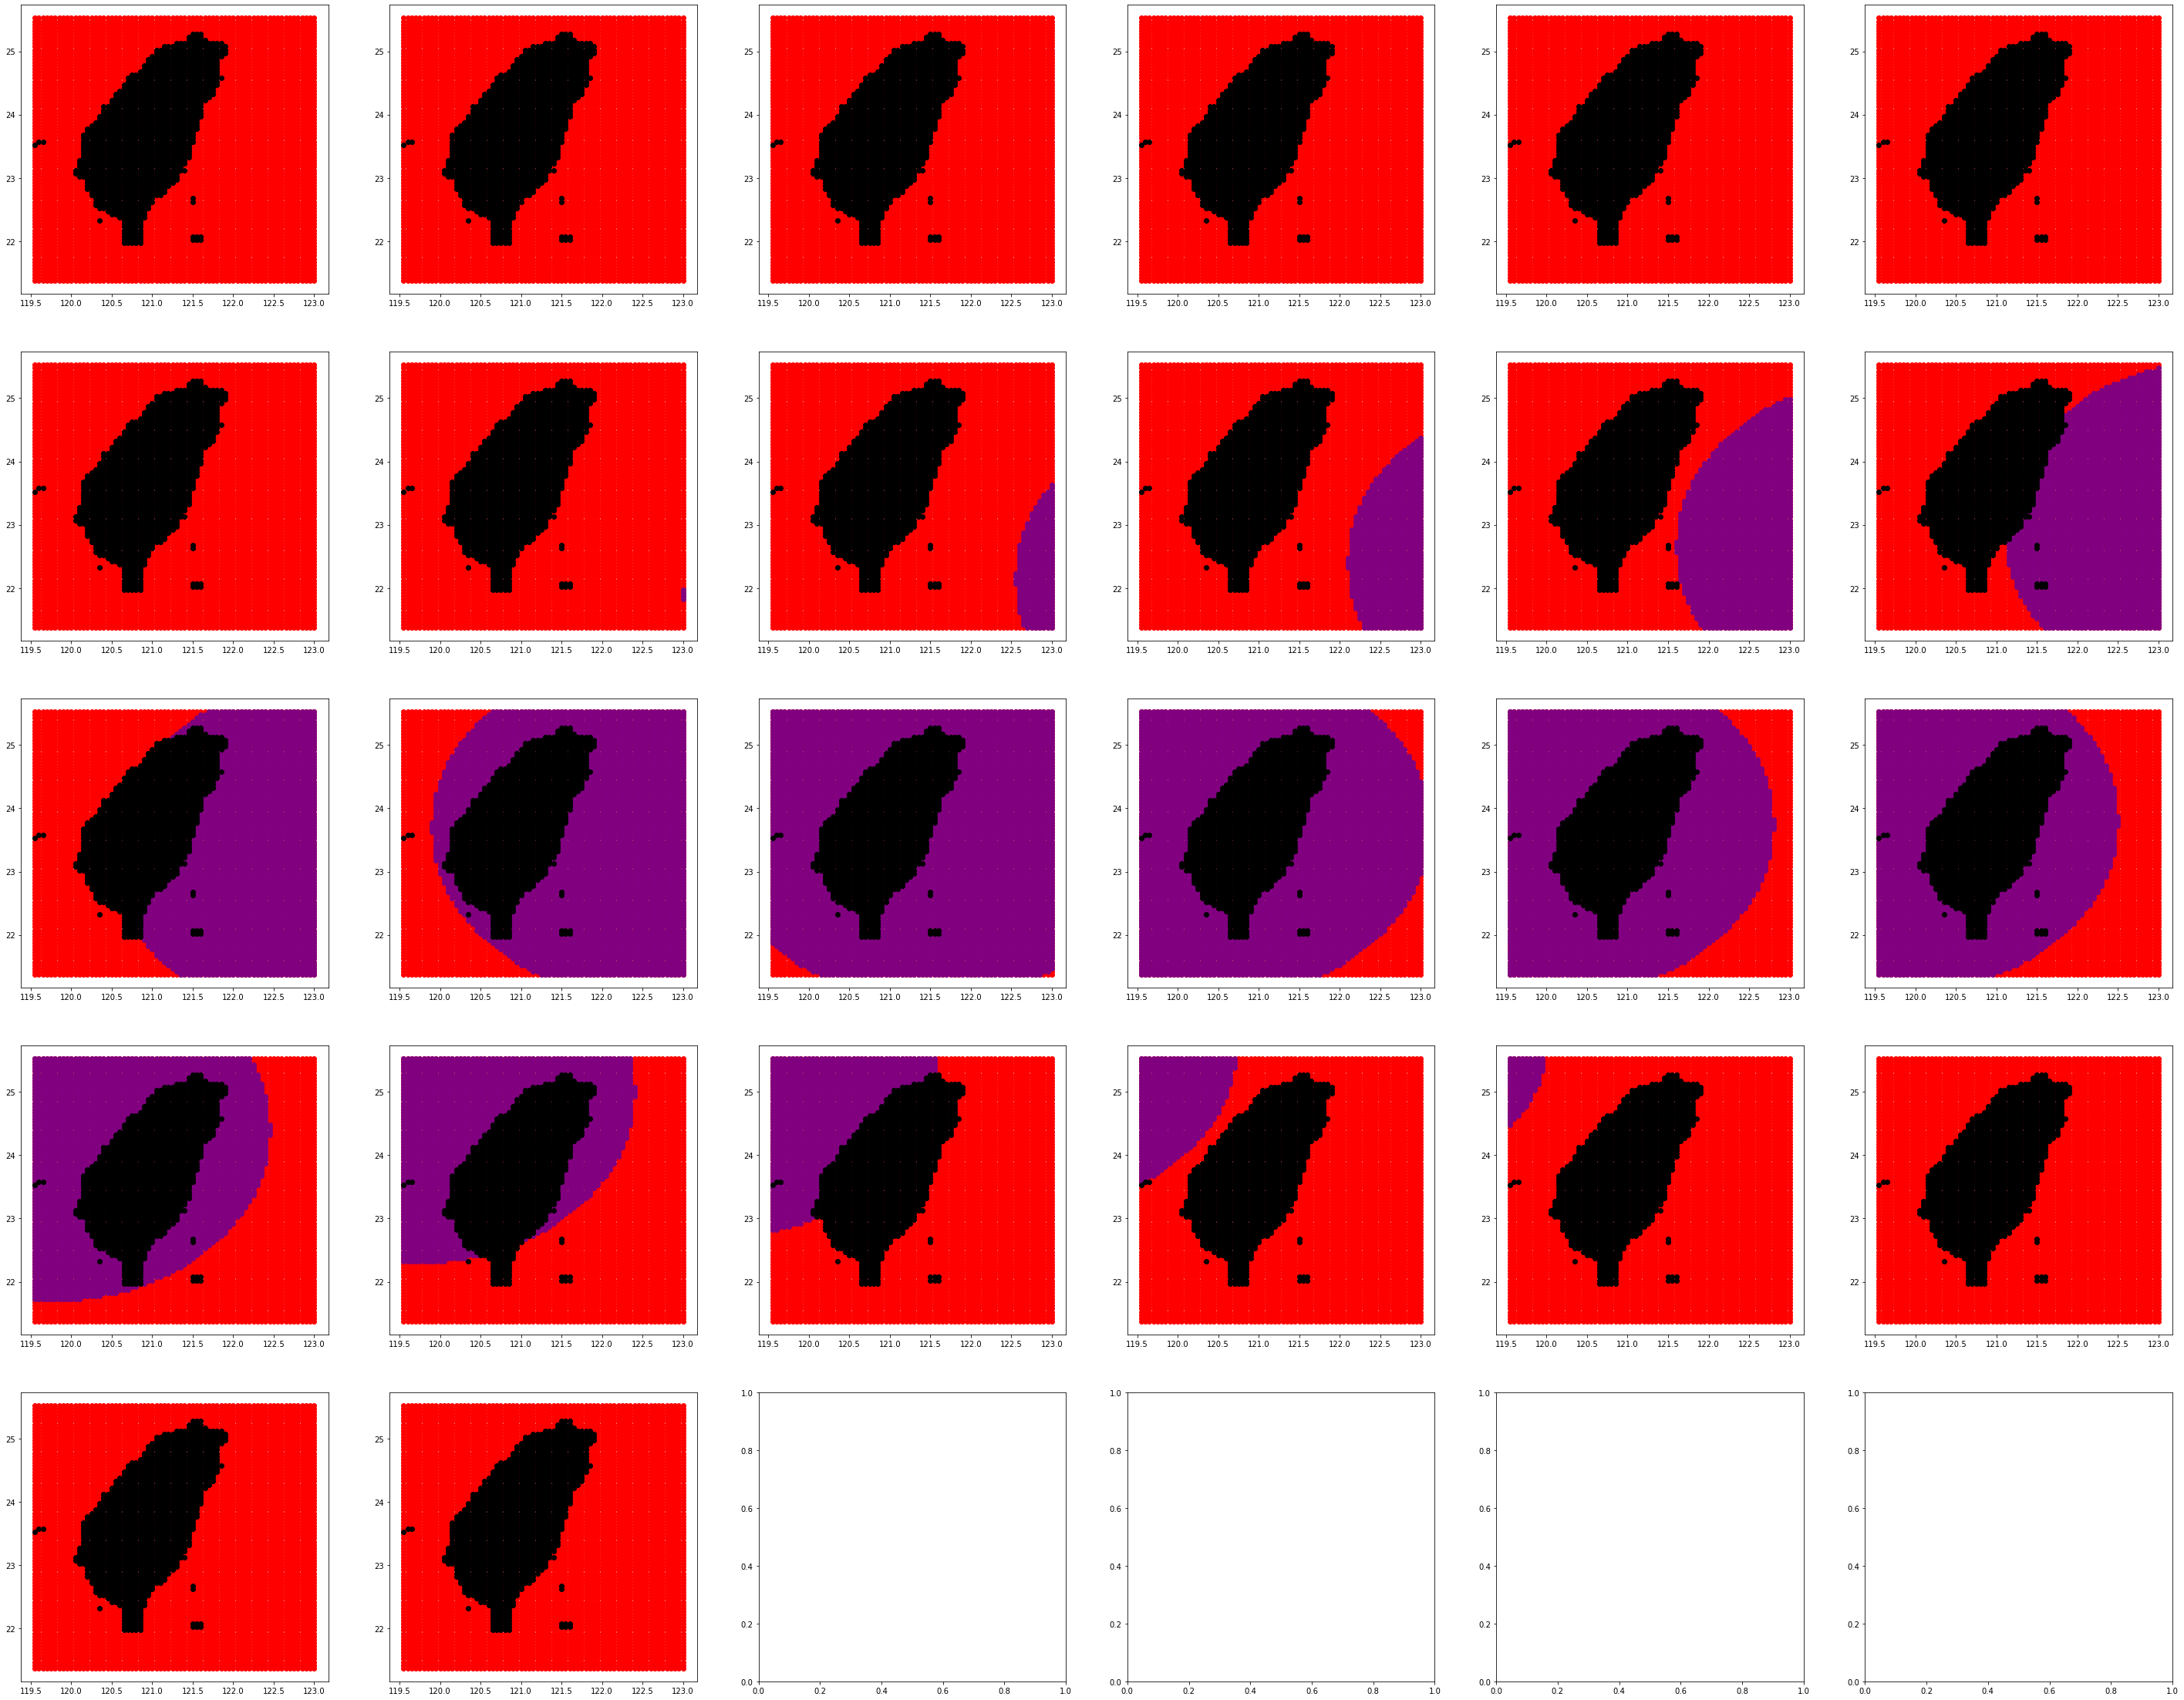

In [6]:
import seaborn as sns
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=6, figsize=(50,40))

for j in range(4, 10):
    ax1[j - 4].scatter(Map_Infor_84_70['V6'], Map_Infor_84_70['V5'], color = 'red')
    ax1[j - 4].scatter(Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V6'], 
             Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V5'], color = 'purple')
    ax1[j - 4].scatter(Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V6'], Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V5'], 
             color = 'black')
for j in range(10, 16):
    ax2[j - 10].scatter(Map_Infor_84_70['V6'], Map_Infor_84_70['V5'], color = 'red')
    ax2[j - 10].scatter(Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V6'], 
             Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V5'], color = 'purple')
    ax2[j - 10].scatter(Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V6'], Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V5'], 
             color = 'black')
for j in range(16, 22):
    ax3[j - 16].scatter(Map_Infor_84_70['V6'], Map_Infor_84_70['V5'], color = 'red')
    ax3[j - 16].scatter(Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V6'], 
             Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V5'], color = 'purple')
    ax3[j - 16].scatter(Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V6'], Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V5'], 
             color = 'black')
for j in range(22, 28):
    ax4[j - 22].scatter(Map_Infor_84_70['V6'], Map_Infor_84_70['V5'], color = 'red')
    ax4[j - 22].scatter(Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V6'], 
             Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V5'], color = 'purple')
    ax4[j - 22].scatter(Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V6'], Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V5'], 
             color = 'black')
    
for j in range(28, 30):
    ax5[j - 28].scatter(Map_Infor_84_70['V6'], Map_Infor_84_70['V5'], color = 'red')
    ax5[j - 28].scatter(Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V6'], 
             Map_Infor_84_70[Map_Infor_84_70['storm_' + str(j)]==1]['V5'], color = 'purple')
    ax5[j - 28].scatter(Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V6'], Map_Infor_84_70[Map_Infor_84_70['V7']!='S']['V5'], 
             color = 'black')


# =========================

# Read sample

In [7]:
file = os.listdir('data')

In [17]:
j = []
for i in range(1, 15):
    j.append(i + 1)
    j.append(i + 1.5)
report = j[1:(len(j)-1)]
report = [str(s).replace('.', '_') for s in report ]

In [18]:
report

['2_5',
 '3',
 '3_5',
 '4',
 '4_5',
 '5',
 '5_5',
 '6',
 '6_5',
 '7',
 '7_5',
 '8',
 '8_5',
 '9',
 '9_5',
 '10',
 '10_5',
 '11',
 '11_5',
 '12',
 '12_5',
 '13',
 '13_5',
 '14',
 '14_5',
 '15']

In [9]:
def creat_train_test_sample_AUG_DYN(r):
    temp = np.empty((0, 25, 84, 70))
    i = report.index(r)
    train_ind_raw = [i, i+1, i+2]
    test_ind = i+3
    temp2 = np.empty((0, 84, 70))
    
    for j in train_ind_raw:
        f = open('data/' + file[j], 'r')
        f2 = open('Geo_infor/location_84_by_70.txt', 'r')
        text = []
        text2 = []

        for line in f.readlines():
            text.append(line.rstrip('\n'))
        for k in range(len(text)):
            text[k] = text[k].split()

        for line in f2.readlines():
            text2.append(line.rstrip('\n'))
        for k in range(len(text2)):
            text2[k] = text2[k].split()

        a = np.array(text).T.reshape(1, 21, 84, 70, order = 'F')[:,1:21,:,:].astype('float64')
        b = np.array(text2).T.reshape(1, 3, 84, 70, order = 'F').astype('float64')
        c = np.array(Map_Infor_84_70[['storm_lon' + str(j + 1), 'storm_lat' + str(j + 1)]]).T.reshape(1, 2, 84, 70, order = 'F').astype('float64')

        a_b = np.append(a, b, axis = 1)
        a_b_c = np.append(a_b, c, axis = 1)
        temp = np.append(temp, a_b_c, axis = 0)
        temp2 = np.append(temp2, np.array(text).T.reshape(1, 21, 84, 70, order = 'F')[:,0,:,:].astype('float64'), axis = 0)
    
    ### test sample
    temp3 = np.empty((0, 25, 84, 70))
    f = open('data/' + file[j], 'r')
    f2 = open('Geo_infor/location_84_by_70.txt', 'r')
    text = []
    text2 = []
    temp4 = np.empty((0, 84, 70))
    
    for line in f.readlines():
        text.append(line.rstrip('\n'))
    for k in range(len(text)):
        text[k] = text[k].split()

    for line in f2.readlines():
        text2.append(line.rstrip('\n'))
    for k in range(len(text2)):
        text2[k] = text2[k].split()

    a = np.array(text).T.reshape(1, 21, 84, 70, order = 'F')[:,1:21,:,:].astype('float64')
    b = np.array(text2).T.reshape(1, 3, 84, 70, order = 'F').astype('float64')
    c = np.array(Map_Infor_84_70[['storm_lon' + str(j + 1), 'storm_lat' + str(j + 1)]]).T.reshape(1, 2, 84, 70, order = 'F').astype('float64')

    a_b = np.append(a, b, axis = 1)
    a_b_c = np.append(a_b, c, axis = 1)
    temp3 = np.append(temp3, a_b_c, axis = 0)
    temp4 = np.append(temp4, np.array(text).T.reshape(1, 21, 84, 70, order = 'F')[:,0,:,:].astype('float64'), axis = 0)
    
    return(torch.tensor(temp, requires_grad = True), torch.tensor(temp2, requires_grad = True), 
           torch.tensor(temp3, requires_grad = True), torch.tensor(temp4, requires_grad = True))

In [10]:
X_train_2_5, Y_train_2_5, X_test_2_5, Y_test_2_5 = creat_train_test_sample_AUG_DYN('2_5')

In [14]:
X_train_2_5.shape

torch.Size([3, 25, 84, 70])

In [15]:
Y_train_2_5.shape

torch.Size([3, 84, 70])

In [20]:
for r in report:
    exec('X_train_noise_' + r +', Y_train_noise_' + r +', X_test_noise_' + r +', Y_test_noise_' + r +' = creat_train_test_sample_AUG_DYN(\'' + r +'\')')
    exec('X_train_' + r +', Y_train_' + r +', X_test_' + r +', Y_test_' + r +' = creat_train_test_sample_AUG_DYN(\'' + r +'\')')
    exec('X_train_area_noise_' + r +', Y_train_area_noise_' + r +', X_test_area_noise_' + r +', Y_test_area_noise_' + r +' = creat_train_test_sample_AUG_DYN(\'' + r +'\')')


In [22]:
for i in report:
    exec('mean_report' + i + '=torch.mean(X_test_' + i + '[:,0:20,:,:],axis=1)')
    exec('sd_report' + i + '=torch.std(X_test_' + i + '[:,0:20,:,:],axis=1)')
    

# ==============================

In [23]:
# Hyper Parameters
# batch_size, epoch and iteration
LR = 0.001
# batch_size = 100
# n_iters = 10000
# num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(100)

In [24]:
# Create CNN Model
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        # Convolution 1 , input_shape=(20,139,111)
        self.cnn1 = nn.Conv2d(in_channels=25, out_channels=32, kernel_size=2, stride=1, padding=1) #output_shape=(16,24,24)
        torch.nn.init.kaiming_normal_(self.cnn1.weight)
        # self.cnn1.weight.data.fill_(0.1)
        # self.cnn1.bias.data.fill_(0.1)
        self.softplus1 = nn.Softplus() # activation
        # Max pool 1
        # self.maxpool1 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,68,54)
        # Convolution 2
        # self.cnn2 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=2, stride=1, padding=1) #output_shape=(48,133,105)
        # self.softplus2 = nn.Softplus() # activation
        # Max pool 2
        # self.maxpool2 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,4,4)
        
        # self.cnn3 = nn.Conv2d(in_channels=48, out_channels=2, kernel_size=3, stride=1, padding=0) #output_shape=(48,133,105)
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=2, kernel_size=2, stride=1, padding=0)
        torch.nn.init.kaiming_normal_(self.cnn3.weight)
        # self.cnn3.weight.data.fill_(0.1)
        # self.cnn3.bias.data.fill_(0.1)
        self.softplus3 = nn.Softplus() # activation
        # Fully connected 1 ,#input_shape=(32*4*4)
        # self.fc1 = nn.Linear(32 * 4 * 4, 10) 
        
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.softplus1(out)
        # Max pool 1
        #out = self.maxpool1(out)
        # Convolution 2 
        # out = self.cnn2(out)
        # out = self.softplus2(out)
        # Max pool 2 
        #out = self.maxpool2(out)
        #out = out.view(out.size(0), -1)
        # Linear function (readout)
        out = self.cnn3(out)
        out = self.softplus3(out)
        return out

In [25]:
def crps_norm(targets, outputs_mu, outputs_sigma):
    eps = 1e-7
    m = torch.distributions.Normal(torch.tensor(0),  torch.tensor(1))
    sx = ((targets - outputs_mu)/(outputs_sigma + eps))
    return (outputs_sigma + eps) * (sx*(2*m.cdf(sx)-1) + 2 * m.log_prob(sx).exp() - 1/torch.sqrt(torch.tensor(torch.pi)))

In [26]:
def crpss(pred, ori):
    return(1 - (pred/ori))

## Training CNN_all

In [27]:
torch.autograd.set_detect_anomaly(True)
torch.manual_seed(10849002)

for i in report:
  exec('training_loss_84_70_AUG_DYN_' + str(i) + '= []')
  exec('validation_loss_84_70_AUG_DYN_' + str(i) + '= []')
  exec('model_84_70_AUG_DYN_' + str(i) + ' = CNN_Model()')
  optimizer = torch.optim.Adam(eval('model_84_70_AUG_DYN_' + str(i)).parameters(), lr=LR)

  for j in range(num_epochs):
    
    for k in range(eval('X_train_' + str(i)).shape[0]):
      ######### Training ###########
      inputs = (eval('X_train_' + str(i))[k,:,:,:][None,:,:,:].float())
      # inputs.requires_grad = True
      labels = (eval('Y_train_'+str(i))[k,:,:])
      # 2.Clear gradients
      optimizer.zero_grad()
      # 3.Forward propagation
      outputs = eval('model_84_70_AUG_DYN_'+ str(i))(inputs)
      # 4.Calculate softmax and cross entropy loss
#       train_loss_total = crps_norm(labels, outputs[0,0,:,:], outputs[0,1,:,:])
      
      if k == 1:
        train_loss_total = 2*crps_norm(labels, outputs[0,0,:,:], outputs[0,1,:,:])
      elif k == 2:
        train_loss_total = 4*crps_norm(labels, outputs[0,0,:,:], outputs[0,1,:,:])
      else:
        train_loss_total = crps_norm(labels, outputs[0,0,:,:], outputs[0,1,:,:])
      
      train_loss = torch.mean(train_loss_total)
      # 5.Calculate gradients

      train_loss.backward()
      # 6.Update parameters
      optimizer.step()
    eval('training_loss_84_70_AUG_DYN_' + str(i)).append(train_loss.data)

    ########## Validation #############
    inputs = (eval('X_test_' + str(i))[0,:,:,:].float())
    # inputs.requires_grad = True
    labels = (eval('Y_test_' + str(i)))[0,:,:]
    outputs = eval('model_84_70_AUG_DYN_'+ str(i))(inputs)
    val_loss_total = crps_norm(labels, outputs[0,:,:], outputs[1,:,:])
    val_loss = torch.mean(val_loss_total)
    eval('validation_loss_84_70_AUG_DYN_' + str(i)).append(val_loss.data)

  exec('training_loss_total_84_70_AUG_DYN_' + str(i) + '= train_loss_total.data')
  exec('validation_loss_total_84_70_AUG_DYN_' + str(i) + '= val_loss_total.data') 

In [205]:
outputs.shape

torch.Size([1, 2, 84, 70])

# Calculate CRPSS

In [28]:
for i in range(1,27):
  exec('ensemble_loss_84_70' + str(report[i-1]) + '= crps_norm(Y_test_'+ report[i-1] +
       '[0,:,:], mean_report' + report[i-1] + '[0,:,:], sd_report'+ report[i-1] +'[0,:,:])')

In [29]:
for i in range(1,27):
  exec('Precip_cate_84_70' + str(report[i-1]) + '=np.digitize(Y_test_' + report[i-1] + '[0,:,:].T.reshape(5880,).detach().numpy(), [10, 80, 200, 350, 500], right = True)')


In [31]:
for i in report:
    exec('CNN_crpss_84_70_AUG_DYN' + str(i) + '= crpss(validation_loss_total_84_70_AUG_DYN_' + str(i) + ', ensemble_loss_84_70' + str(i) + ')')
    